In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/winequality-red.csv')

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.shape

(1599, 12)

In [ ]:
print(data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [ ]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
columns = data.columns
for i in columns:
  print(data[i].describe())

In [ ]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# data visualisation

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

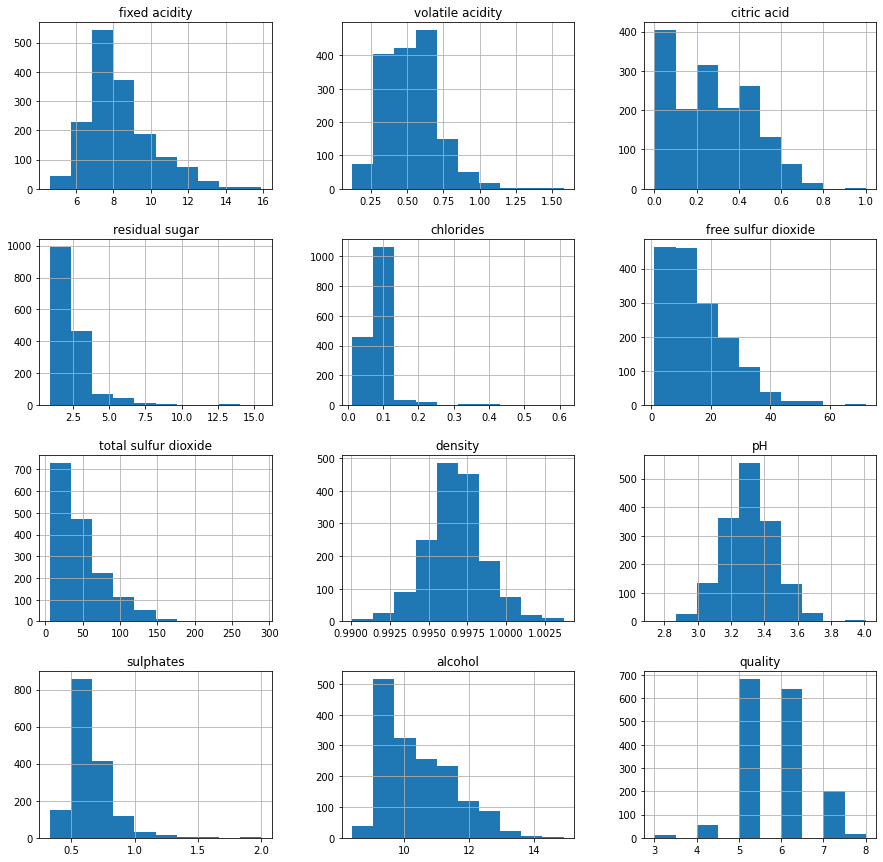

In [ ]:
# data.hist(figsize=(15,15))
# plt.show()

In [ ]:
import plotly.express as px
for i in columns:
  fig = px.histogram(data, x=data[i])
  fig.show()

In [ ]:
# vars = ['chlorides', 'quality']
# temp_data = data[vars]
# temp_data.plot(x='chlorides',y='quality')

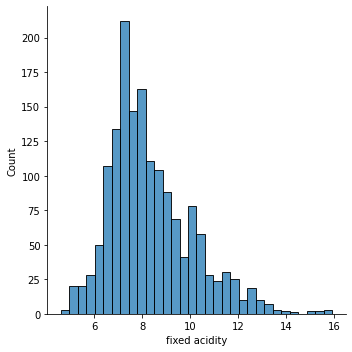

In [ ]:
sns.displot(data['fixed acidity'])

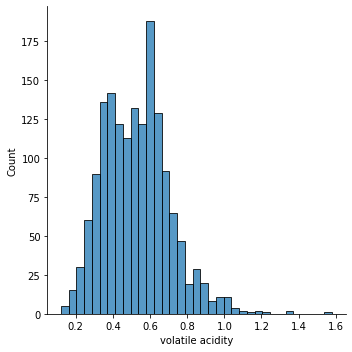

In [ ]:
sns.displot(data['volatile acidity'])

# Co-orealtion Matrix

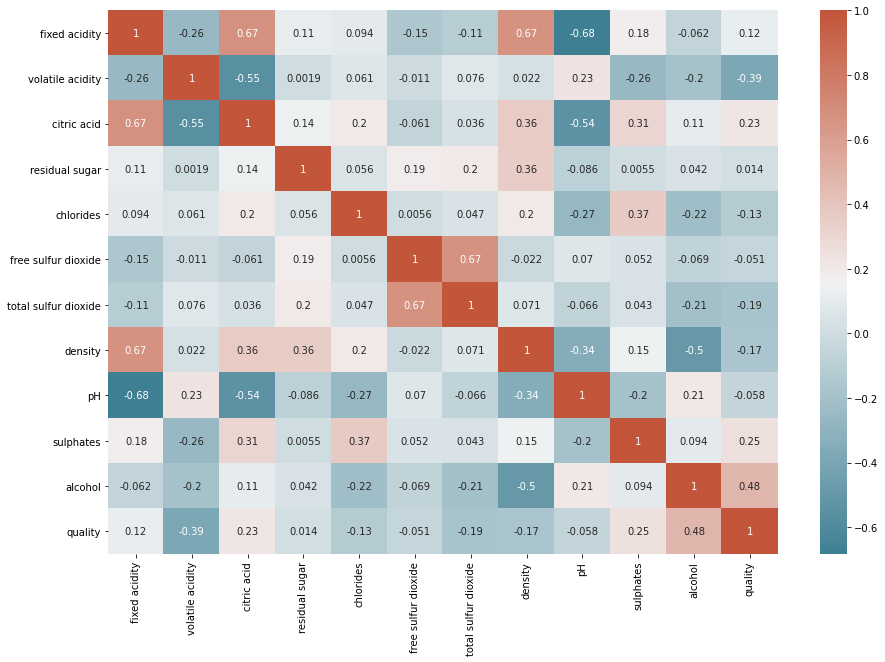

In [ ]:
corr_matrix = data.corr()
fig = plt.figure(figsize = (15, 10)) 
sns.heatmap(corr_matrix,xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True)) 
plt.show()

Creating classification version of the target variable 


*   If the quality is greater than or equal to 7, then the wine is of good quality else it is of poor quality





In [ ]:
data['goodquality'] = [1 if x>=7 else 0 for x in data['quality']]

In [ ]:
data['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [ ]:
#As we can see, here the data is highly unbalanced with the wine that is of poor quality is much more than the wine that is of good quality

Categorizing the target attribute 

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [ ]:
#Separate features and the target 
features = data.drop(['quality','goodquality'],axis=1)
target = data['goodquality']

In [ ]:
features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


Normalize the feature variables 

In [ ]:
from sklearn.preprocessing import StandardScaler
X_features = features
feature_attr = StandardScaler().fit_transform(X_features)

In [ ]:
temp_data1 = data[data['goodquality']==1]
temp_data1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0
mean,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949,1.0
std,1.999977,0.144963,0.194438,1.363026,0.028480,10.234615,32.572238,0.002201,0.154478,0.134038,0.998153,0.276443,0.0
min,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,2.880000,0.390000,9.200000,7.000000,1.0
25%,7.400000,0.300000,0.300000,2.000000,0.062000,6.000000,17.000000,0.994700,3.200000,0.650000,10.800000,7.000000,1.0
50%,8.700000,0.370000,0.400000,2.300000,0.073000,11.000000,27.000000,0.995720,3.270000,0.740000,11.600000,7.000000,1.0
75%,10.100000,0.490000,0.490000,2.700000,0.085000,18.000000,43.000000,0.997350,3.380000,0.820000,12.200000,7.000000,1.0
max,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.780000,1.360000,14.000000,8.000000,1.0


In [ ]:
temp_data2 = data[data['goodquality']==0]
temp_data2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.0
mean,8.236831,0.547022,0.254407,2.512120,0.089281,16.172214,48.285818,0.996859,3.314616,0.644754,10.251037,5.408828,0.0
std,1.682726,0.176337,0.189665,1.415778,0.049113,10.467685,32.585604,0.001808,0.154135,0.170629,0.969664,0.601719,0.0
min,4.600000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.0
25%,7.100000,0.420000,0.082500,1.900000,0.071000,8.000000,23.000000,0.995785,3.210000,0.540000,9.500000,5.000000,0.0
50%,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,39.500000,0.996800,3.310000,0.600000,10.000000,5.000000,0.0
75%,9.100000,0.650000,0.400000,2.600000,0.091000,22.000000,65.000000,0.997900,3.410000,0.700000,10.900000,6.000000,0.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,2.000000,14.900000,6.000000,0.0


# Splitting the dataset into training and testiing


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature_attr, target, train_size=0.75)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print((y_train.shape))
print((y_test.shape))


(1199, 11)
(400, 11)
(1199,)
(400,)


# Building the models

Decision Tree

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
accuracy_score = dt_model.score(x_test,y_test)
print(f'Accuracy of model on test dataset:-  {accuracy_score}')
dt_preditctions = dt_model.predict(x_test)

Accuracy of model on test dataset:-  0.895


In [ ]:
print(f"Confusion Matrix :- \n {confusion_matrix(y_test, dt_preditctions)}")

Confusion Matrix :- 
 [[331  20]
 [ 22  27]]


In [ ]:
print(f"Classification Report :- \n {classification_report(y_test, dt_preditctions)}")

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       351
           1       0.57      0.55      0.56        49

    accuracy                           0.90       400
   macro avg       0.76      0.75      0.75       400
weighted avg       0.89      0.90      0.89       400



Linear Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
accuracy_score = lr_model.score(x_test,y_test)
print(f'Accuracy of model on test dataset:-  {accuracy_score}')
lr_predict = lr_model.predict(x_test)
print(f"Confusion Matrix :- \n {confusion_matrix(y_test, lr_predict)}")
print(f"Classification Report :- \n {classification_report(y_test, lr_predict)}")

Accuracy of model on test dataset:-  0.9
Confusion Matrix :- 
 [[340  11]
 [ 29  20]]
Classification Report :- 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       351
           1       0.65      0.41      0.50        49

    accuracy                           0.90       400
   macro avg       0.78      0.69      0.72       400
weighted avg       0.89      0.90      0.89       400



Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 1)
rf_model.fit(x_train,y_train)
accuracy_score = rf_model.score(x_test,y_test)
print(f'Accuracy of model on test dataset:-  {accuracy_score}')
rf_predict = rf_model.predict(x_test)
print(f"Confusion Matrix :- \n {confusion_matrix(y_test, rf_predict)}")
print(f"Classification Report :- \n {classification_report(y_test, rf_predict)}")

Accuracy of model on test dataset:-  0.9225
Confusion Matrix :- 
 [[343   8]
 [ 23  26]]
Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       351
           1       0.76      0.53      0.63        49

    accuracy                           0.92       400
   macro avg       0.85      0.75      0.79       400
weighted avg       0.92      0.92      0.92       400



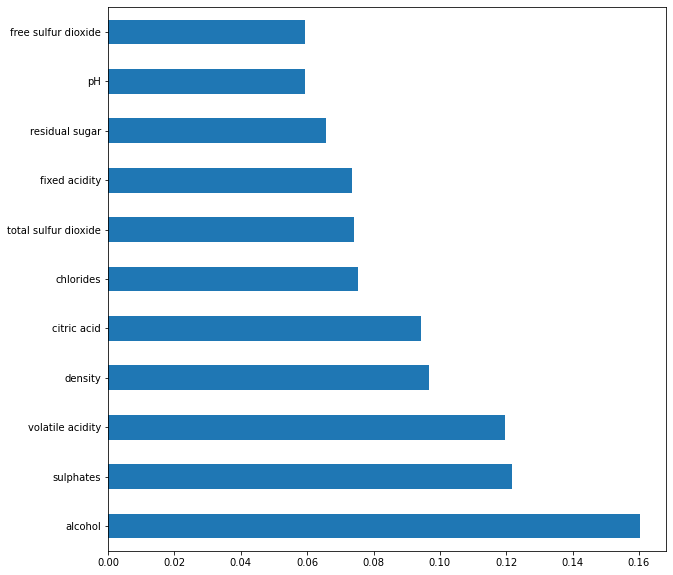

In [ ]:
#Checking the importance of the features 
feat_importances = pd.Series(rf_model.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))